# 조리식품 레시피 API 데이터 분석

In [32]:
import pandas as pd

# CSV 파일 읽기
df = pd.read_csv('../result/recipes.csv')
df

,food_name,type,servings,ingredients,cooking_order,views,tips
0,새우 두부 계란찜,반찬,1,"['새우두부계란찜', '연두부 75g(3/4모), 칵테일새우 20g(5마리), 달걀...","['1. 손질된 새우를 끓는 물에 데쳐 건진다.', '2. 연두부, 달걀, 생크림,...",0,"나트륨의 배출을 도와주는 것으로 알려진 칼륨이 풍부한 시금치와 소금, 간장 등의 양..."
1,부추 콩가루 찜,반찬,1,"['·양념장 : 저염간장 3g(2/3작은술), 다진 대파 5g(1작은술), 다진 마...","['1. 부추는 깨끗이 씻어 물기를 제거하고, 5cm 길이로 썰고 부추에 날콩가루를...",0,콩가루로 버무려 감칠맛과 고소한 맛으로 나트륨 사용량을 줄여보세요. 부추는 피를 맑...
2,방울토마토 소박이,반찬,1,"['●방울토마토 소박이 :', '방울토마토 150g(5개), 양파 10g(3×1cm...",['1. 물기를 빼고 2cm 정도의 크기로 썰은 부추와 양파를 양념장에 섞어 양념속...,0,소금에 절이는 오이 대신 방울토마토를 사용하여 나트륨 섭취를 줄였어요. 토마토에는 ...
3,순두부 사과 소스 오이무침,반찬,1,"['●오이무침 :', '오이 70g(1/3개), 다진 땅콩 10g(1큰술)', '●...","['1. 사과, 순두부를 믹서에 넣고 곱게 갈아 소스를 만든다.', '2. 오이는 ...",0,사과에는 팩틴이 풍부하여 체내 나쁜 콜레스테롤을 감소시키고 나트륨 배출을 촉진시켜줘...
4,사과 새우 북엇국,국&찌개,1,"['북엇국', '북어채 25g(15개), 새우 10g(3마리), 사과 30g(1/5...","['2. 북어채를 잘게 손으로 찢어 찬물에 헹구어 준비한 후 양파, 표고버섯, 사과...",0,소금과 간장 대신 북어채와 새우의 짠맛으로 간을 한 담백한 맛의 북엇국을 만들었어요...
...,...,...,...,...,...,...,...
1119,양파토마토스튜,국&찌개,2,[],['1. 물(8컵)에 육수 재료와 마늘(2쪽)을 넣어 끓으면 다시마를 건진 뒤 약한...,0,칼륨 함량이 높은 토마토는 나트륨 배출에 도움을 줘요. 멸치 육수로 간을 맞추어 나...
1120,황금팽이 비빔국수,기타,2,[],"['1. 황금팽이버섯은 밑동을 자른 뒤 낱낱이 가르고, 양파, 상추, 깻잎, 오이는...",0,"칼륨 함량이 높은 천도복숭아는 나트륨 배출에 도움을 주고, 천도복숭아의 단맛으로 첨..."
1121,맛살 미역줄기전,반찬,4,[],"['1. 미역 줄기는 흐르는 물에 여러 번 헹구고, 찬물에 1시간 정도 담가둔다.'...",0,"미역 줄기를 물에 담그고, 게맛살을 데쳐 나트륨 함량을 줄였어요. 양파를 이용하여 ..."
1122,해산물샐러드와 미나리소스,반찬,2,[],"['1. 새송이버섯은 모양대로 도톰하게 썰고, 방울토마토는 꼭지를 제거한 뒤 열십자...",0,칼륨 함량이 높은 토마토는 나트륨 배출에 도움을 줘요. 미나리를 사용하여 재료 본연...


### API 오류로 재료를 못 가져온 행 정제 : 다시 API 호출

In [33]:
import sys
import os

# 현재 경로의 상위 폴더로 이동하여 'data' 폴더를 경로에 추가
sys.path.append(os.path.abspath(os.path.join('..')))

# 이제 config.py 파일에서 RECIPE_API를 임포트
from config import RECIPE_API
import requests
import json

def findJoriIngredints(menu:str):
    url = f"http://openapi.foodsafetykorea.go.kr/api/{RECIPE_API}/COOKRCP01/json/1/5/RCP_NM={menu}"

    # API 요청
    response = requests.get(url)

    # 응답 상태 확인
    if response.status_code == 200:
        data = json.loads(response.text)
        print(data)
    else:
        print(f"API 요청 실패, 상태 코드: {response.status_code}")

    # 필요한 정보 추출
    ingredients = data['COOKRCP01']['row'][0]['RCP_PARTS_DTLS']

    return ingredients

In [34]:
# ingredients 컬럼에서 값이 빈 리스트([])인 행을 찾기 => 44개
empty_ingredients_df = df[df['ingredients'].apply(lambda x: x == '[]')]
print(f'재료 못가져온 행의 갯수 : {len(empty_ingredients_df)}')
empty_ingredients_df

재료 못가져온 행의 갯수 : 44


,food_name,type,servings,ingredients,cooking_order,views,tips
493,호박잎다슬기된장국,국&찌개,1,[],"['1. 물 1컵 반에 국멸치와 건다시마를 넣고 멸치다시마국물 1컵을 낸다.', '...",0,호박잎은 비벼서 연하게 만든 후 사용한다. - 다슬기를 달걀물에 묻혀 넣으면 달걀이...
494,양배추두부찜과 양파케첩소스,반찬,1,[],"['1. 양배추는 씻어 잎을 넓게 뗀 후 7×12cm 가량의 크기로 자른다.', '...",0,양배추의 단단한 잎줄기는 부드러운 잎과 열을 받는 시차가 다르고 음식을 할 때도 모...
584,들깨삼겹살과 참외쌈장,반찬,2,[],"['1. 냄비에 물(3컵)과 양념을 넣어 5분간 끓이고, 삼겹살을 넣어 중간 불로 ...",0,"나트륨 배출에 도움을 주는 칼륨이 풍부한 참외, 영양부추, 견과류를 사용했어요. 설..."
585,돼지고기 포두부 파스타,기타,2,[],"['1. 양파는 3mm 두께로 채 썰고, 마늘은 납작 썰고, 대파와 청양고추는 어슷...",0,"조미료 대신 마늘, 대파, 건새우, 닭육수가 감칠맛을 살리고, 청양고추의 칼칼한 맛..."
586,단호박 양파잼 샌드위치,기타,2,[],"['1. 양파는 얇게 채 썰고, 단호박은 껍질과 씨를 제거한 뒤 큼직하게 썰고, 말...",0,칼륨 함량이 높은 우유는 나트륨 배출에 도움을 줘요. 단호박과 양파를 구워 단맛을 ...
595,토마토소스 애호박냉파스타,기타,2,[],"['1. 토마토는 꼭지를 제거하고, 열십자로 칼집을 낸 뒤 끓는 물에 30초간 데쳐...",0,"칼륨 함량이 높은 토마토, 참외, 애호박은 나트륨 배출에 도움을 줘요."
596,새우채소 김치롤,반찬,2,[],"['1. 김치는 깨끗하게 씻어 찬물에 30분간 담근 뒤 건져내고, 물기를 꼭 짠 뒤...",0,"김치를 물에 담그고, 크래미 및 새우를 물에 데치면 나트륨 섭취를 줄일 수 있어요."
611,두부크림 관자뇨키,일품,2,[],"['1. 양파는 5mm 두께로 채 썰고, 청양고추는 어슷 썬 뒤 씨를 제거하고, 관...",0,해산물과 소량의 치즈를 넣어 감칠맛을 내며 채소와 향신료로 풍미를 높여 소금의 사용...
616,단호박 양고기볶음,반찬,2,[],"['1. 콜리플라워는 송이 부분만 떼어내고, 고구마와 양파는 한입 크기로 썬다.',...",0,"단호박, 양파, 고구마, 콜리플라워 등을 사용해 식감을 높이고 단맛을 보완했어요. ..."
625,강황 투움바 파스타,기타,2,[],"['1. 양파는 도톰하게 채 썰고, 양송이버섯은 모양대로 썰고, 마늘은 납작 썰고,...",0,칼륨 함량이 높은 토마토와 양송이버섯은 나트륨 배출에 도움을 줘요.


In [35]:
# 해당 행의 food_name 컬럼 값들 가져오기
food_names = list(empty_ingredients_df['food_name'])
print(food_names)

for food_name in food_names:
    ingredients = findJoriIngredints(food_name)
    # food_name이 x인 행의 ingredients 값을 y로 변경
    empty_ingredients_df.loc[df['food_name'] == food_name, 'ingredients'] = ingredients
    
empty_ingredients_df

['호박잎다슬기된장국', '양배추두부찜과 양파케첩소스', '들깨삼겹살과 참외쌈장', '돼지고기 포두부 파스타', '단호박 양파잼 샌드위치', '토마토소스 애호박냉파스타', '새우채소 김치롤', '두부크림 관자뇨키', '단호박 양고기볶음', '강황 투움바 파스타', '카레삼겹살 파니니', '어린잎채소 건두부말이', '방아잎 닭고기말이', '새우 카레 빠에야', '라이스페이퍼 수제소시지', '치즈토마토 가지구이', '묵은지 밀푀유나베', '단호박 라타투이', '버터치킨카레', '소고기찜과 검은콩수제비', '해조비빔국수', '닭봉 로제스튜', '수제새우소시지', '레몬연어 파피요트', '꽈리고추 닭강정', '참치두부 주먹밥', '골뱅이무침과 삼겹살수육', '버섯초계탕', '사과채소타코', '채소롤초밥', '당근새우 카나페', '아보카도 수란샐러드', '닭가슴살 채소쌈', '시금치 후무스', '봄주먹밥', '새싹 비빔밥', '곤약 콩조림', '타이거새우 현미볶음밥', '카레크림 두부면 파스타', '양파토마토스튜', '황금팽이 비빔국수', '맛살 미역줄기전', '해산물샐러드와 미나리소스', '매운요거트 토마토샐러드']
{'COOKRCP01': {'total_count': '1', 'row': [{'RCP_PARTS_DTLS': '', 'RCP_WAY2': '끓이기', 'MANUAL_IMG20': '', 'MANUAL20': '', 'RCP_SEQ': '691', 'INFO_NA': '577.2', 'INFO_WGT': '', 'INFO_PRO': '9.5', 'MANUAL_IMG13': '', 'MANUAL_IMG14': '', 'MANUAL_IMG15': '', 'MANUAL_IMG16': '', 'MANUAL_IMG10': '', 'MANUAL_IMG11': '', 'MANUAL_IMG12': '', 'MANUAL_IMG17': '', 'MANUAL_IMG18': '', 'MANUAL_IMG19': '', 'INFO_FAT': '5.9', 'HASH_TAG': ''

,food_name,type,servings,ingredients,cooking_order,views,tips
493,호박잎다슬기된장국,국&찌개,1,,"['1. 물 1컵 반에 국멸치와 건다시마를 넣고 멸치다시마국물 1컵을 낸다.', '...",0,호박잎은 비벼서 연하게 만든 후 사용한다. - 다슬기를 달걀물에 묻혀 넣으면 달걀이...
494,양배추두부찜과 양파케첩소스,반찬,1,,"['1. 양배추는 씻어 잎을 넓게 뗀 후 7×12cm 가량의 크기로 자른다.', '...",0,양배추의 단단한 잎줄기는 부드러운 잎과 열을 받는 시차가 다르고 음식을 할 때도 모...
584,들깨삼겹살과 참외쌈장,반찬,2,"[ 2인분 ] 삼겹살(200g), 참외(중간 크기 1개), 영양부추(50g), 들깻...","['1. 냄비에 물(3컵)과 양념을 넣어 5분간 끓이고, 삼겹살을 넣어 중간 불로 ...",0,"나트륨 배출에 도움을 주는 칼륨이 풍부한 참외, 영양부추, 견과류를 사용했어요. 설..."
585,돼지고기 포두부 파스타,기타,2,"[ 2인분 ] 양파(½개), 마늘(6~7쪽), 대파(1대), 다진 돼지고기(400g...","['1. 양파는 3mm 두께로 채 썰고, 마늘은 납작 썰고, 대파와 청양고추는 어슷...",0,"조미료 대신 마늘, 대파, 건새우, 닭육수가 감칠맛을 살리고, 청양고추의 칼칼한 맛..."
586,단호박 양파잼 샌드위치,기타,2,"[ 2인분 ] 양파(3개), 미니 단호박(2개), 삶은 달걀(3개), 우유(½컵),...","['1. 양파는 얇게 채 썰고, 단호박은 껍질과 씨를 제거한 뒤 큼직하게 썰고, 말...",0,칼륨 함량이 높은 우유는 나트륨 배출에 도움을 줘요. 단호박과 양파를 구워 단맛을 ...
595,토마토소스 애호박냉파스타,기타,2,"[ 2인분 ] 토마토(2개), 참외(1개), 오이(1개), 양파(½개), 마늘(3쪽...","['1. 토마토는 꼭지를 제거하고, 열십자로 칼집을 낸 뒤 끓는 물에 30초간 데쳐...",0,"칼륨 함량이 높은 토마토, 참외, 애호박은 나트륨 배출에 도움을 줘요."
596,새우채소 김치롤,반찬,2,"[ 2인분 ] 김치(¼포기), 오이(1개), 파프리카(노랑, 빨강 각 1개), 깻잎...","['1. 김치는 깨끗하게 씻어 찬물에 30분간 담근 뒤 건져내고, 물기를 꼭 짠 뒤...",0,"김치를 물에 담그고, 크래미 및 새우를 물에 데치면 나트륨 섭취를 줄일 수 있어요."
611,두부크림 관자뇨키,일품,2,"[ 2인분 ] 양파(25g), 관자(200g), 새우(6마리), 모시조개(6개), ...","['1. 양파는 5mm 두께로 채 썰고, 청양고추는 어슷 썬 뒤 씨를 제거하고, 관...",0,해산물과 소량의 치즈를 넣어 감칠맛을 내며 채소와 향신료로 풍미를 높여 소금의 사용...
616,단호박 양고기볶음,반찬,2,"[ 2인분 ] 콜리플라워(50g), 고구마(1개), 양파(1개), 양고기(부채살, ...","['1. 콜리플라워는 송이 부분만 떼어내고, 고구마와 양파는 한입 크기로 썬다.',...",0,"단호박, 양파, 고구마, 콜리플라워 등을 사용해 식감을 높이고 단맛을 보완했어요. ..."
625,강황 투움바 파스타,기타,2,"[ 2인분 ] 양파(1개), 양송이버섯(6개), 마늘(5쪽), 토마토(3개), 탈리...","['1. 양파는 도톰하게 채 썰고, 양송이버섯은 모양대로 썰고, 마늘은 납작 썰고,...",0,칼륨 함량이 높은 토마토와 양송이버섯은 나트륨 배출에 도움을 줘요.


In [36]:
# 빈 값이 채워진 DataFrame과 원본 DataFrame을 결합
merged_df = pd.concat([df[~df.index.isin(empty_ingredients_df.index)], empty_ingredients_df], ignore_index=True)

merged_df

,food_name,type,servings,ingredients,cooking_order,views,tips
0,새우 두부 계란찜,반찬,1,"['새우두부계란찜', '연두부 75g(3/4모), 칵테일새우 20g(5마리), 달걀...","['1. 손질된 새우를 끓는 물에 데쳐 건진다.', '2. 연두부, 달걀, 생크림,...",0,"나트륨의 배출을 도와주는 것으로 알려진 칼륨이 풍부한 시금치와 소금, 간장 등의 양..."
1,부추 콩가루 찜,반찬,1,"['·양념장 : 저염간장 3g(2/3작은술), 다진 대파 5g(1작은술), 다진 마...","['1. 부추는 깨끗이 씻어 물기를 제거하고, 5cm 길이로 썰고 부추에 날콩가루를...",0,콩가루로 버무려 감칠맛과 고소한 맛으로 나트륨 사용량을 줄여보세요. 부추는 피를 맑...
2,방울토마토 소박이,반찬,1,"['●방울토마토 소박이 :', '방울토마토 150g(5개), 양파 10g(3×1cm...",['1. 물기를 빼고 2cm 정도의 크기로 썰은 부추와 양파를 양념장에 섞어 양념속...,0,소금에 절이는 오이 대신 방울토마토를 사용하여 나트륨 섭취를 줄였어요. 토마토에는 ...
3,순두부 사과 소스 오이무침,반찬,1,"['●오이무침 :', '오이 70g(1/3개), 다진 땅콩 10g(1큰술)', '●...","['1. 사과, 순두부를 믹서에 넣고 곱게 갈아 소스를 만든다.', '2. 오이는 ...",0,사과에는 팩틴이 풍부하여 체내 나쁜 콜레스테롤을 감소시키고 나트륨 배출을 촉진시켜줘...
4,사과 새우 북엇국,국&찌개,1,"['북엇국', '북어채 25g(15개), 새우 10g(3마리), 사과 30g(1/5...","['2. 북어채를 잘게 손으로 찢어 찬물에 헹구어 준비한 후 양파, 표고버섯, 사과...",0,소금과 간장 대신 북어채와 새우의 짠맛으로 간을 한 담백한 맛의 북엇국을 만들었어요...
...,...,...,...,...,...,...,...
1119,양파토마토스튜,국&찌개,2,"[ 2인분 ] 마늘(4쪽), 토마토(2개), 양파(1개), 월계수잎(2장), 육수용...",['1. 물(8컵)에 육수 재료와 마늘(2쪽)을 넣어 끓으면 다시마를 건진 뒤 약한...,0,칼륨 함량이 높은 토마토는 나트륨 배출에 도움을 줘요. 멸치 육수로 간을 맞추어 나...
1120,황금팽이 비빔국수,기타,2,"[ 2인분 ] 황금팽이버섯(400g), 양파( 개), 상추(2장), 깻잎(2장), ...","['1. 황금팽이버섯은 밑동을 자른 뒤 낱낱이 가르고, 양파, 상추, 깻잎, 오이는...",0,"칼륨 함량이 높은 천도복숭아는 나트륨 배출에 도움을 주고, 천도복숭아의 단맛으로 첨..."
1121,맛살 미역줄기전,반찬,4,"[ 4인분 ] 미역 줄기(1팩=300g), 양파(½개), 맛살(135g), 건새우(...","['1. 미역 줄기는 흐르는 물에 여러 번 헹구고, 찬물에 1시간 정도 담가둔다.'...",0,"미역 줄기를 물에 담그고, 게맛살을 데쳐 나트륨 함량을 줄였어요. 양파를 이용하여 ..."
1122,해산물샐러드와 미나리소스,반찬,2,"[ 2인분 ] 새송이버섯(1개), 방울토마토(200g), 오징어(1마리), 칵테일새...","['1. 새송이버섯은 모양대로 도톰하게 썰고, 방울토마토는 꼭지를 제거한 뒤 열십자...",0,칼륨 함량이 높은 토마토는 나트륨 배출에 도움을 줘요. 미나리를 사용하여 재료 본연...


In [37]:
# ingredients 컬럼에서 값이 빈 리스트([])인 행을 찾기 => 44개
empty_ingredients_df = merged_df[merged_df['ingredients'].apply(lambda x: x == '')]
print(f'재료 못가져온 행의 갯수 : {len(empty_ingredients_df)}')
empty_ingredients_df

재료 못가져온 행의 갯수 : 3


,food_name,type,servings,ingredients,cooking_order,views,tips
1080,호박잎다슬기된장국,국&찌개,1,,"['1. 물 1컵 반에 국멸치와 건다시마를 넣고 멸치다시마국물 1컵을 낸다.', '...",0,호박잎은 비벼서 연하게 만든 후 사용한다. - 다슬기를 달걀물에 묻혀 넣으면 달걀이...
1081,양배추두부찜과 양파케첩소스,반찬,1,,"['1. 양배추는 씻어 잎을 넓게 뗀 후 7×12cm 가량의 크기로 자른다.', '...",0,양배추의 단단한 잎줄기는 부드러운 잎과 열을 받는 시차가 다르고 음식을 할 때도 모...
1116,곤약 콩조림,반찬,1,,"['1. 곤약은 4cm 길이로 얇게 썬 후 가운데 칼집을 넣어 꼰다.', '2. 곤...",0,저나트륨 조림소스는 보통 조림소스보다 간장 양을 1/3정도 줄여서 사용하므로 색을 ...


In [38]:
# 'ingredients' 열이 빈 문자열인 행을 삭제
merged_df = merged_df[merged_df['ingredients'] != '']

len(merged_df)

1121

### servings 값 확인

In [40]:
# 결측치 확인
missing_servings = merged_df['servings'].isnull().sum()
print(f"Missing servings: {missing_servings}")

# 기초 통계 정보 확인
servings_stats = merged_df['servings'].describe()
print(servings_stats)

Missing servings: 0
count    1121.000000
mean        1.049063
std         0.250538
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         5.000000
Name: servings, dtype: float64


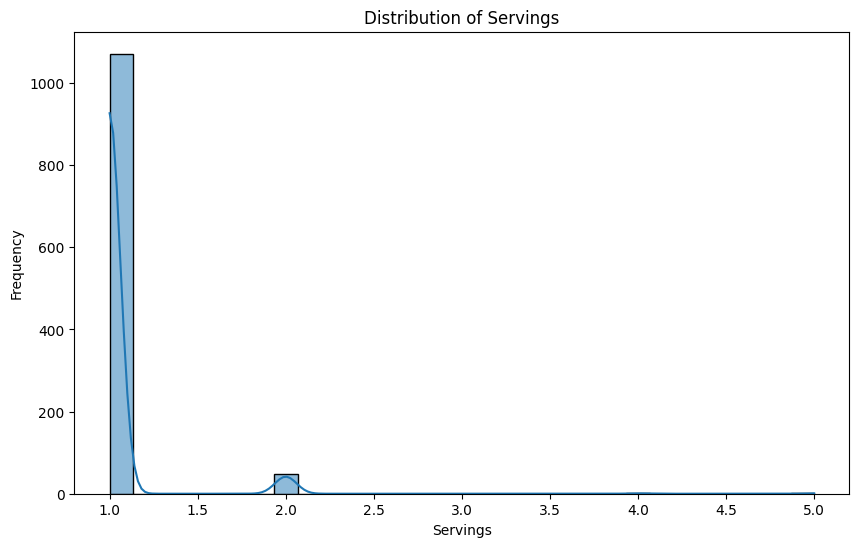

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# 분포 시각화
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['servings'], bins=30, kde=True)
plt.title('Distribution of Servings')
plt.xlabel('Servings')
plt.ylabel('Frequency')
plt.show()

In [45]:
# 고유 값 확인
unique_servings = merged_df['servings'].unique()
print(f"Unique servings values: {unique_servings}")

Unique servings values: [1 2 5 4]


In [50]:
# servings 값이 5인 행
servings_5 = merged_df[merged_df['servings'] == 5]
print("Servings = 5:")
servings_5

Servings = 5:


,food_name,type,servings,ingredients,cooking_order,views,tips
1115,새싹 비빔밥,밥,5,"밥 100g, 각종 새싹 20g, 무순 2g, 샐러리 5g, 쑥갓 5g, 래디쉬 1...","['1. 새싹과 무순은 씻어 물기를 제거한다.', '2. 셀러리는 껍질을 벗겨 3c...",0,NaN


In [51]:
# servings 값이 4인 행
servings_4 = merged_df[merged_df['servings'] == 4]
print("\nServings = 4:")
servings_4


Servings = 4:


,food_name,type,servings,ingredients,cooking_order,views,tips
1121,맛살 미역줄기전,반찬,4,"[ 4인분 ] 미역 줄기(1팩=300g), 양파(½개), 맛살(135g), 건새우(...","['1. 미역 줄기는 흐르는 물에 여러 번 헹구고, 찬물에 1시간 정도 담가둔다.'...",0,"미역 줄기를 물에 담그고, 게맛살을 데쳐 나트륨 함량을 줄였어요. 양파를 이용하여 ..."


### servings 5인 값 servings=1로 바꾸기

In [52]:
# servings 값이 5인 행의 servings 값을 1로 변경
merged_df.loc[merged_df['servings'] == 5, 'servings'] = 1

# servings 값이 5인 행
servings_5 = merged_df[merged_df['servings'] == 5]
print("Servings = 5:")
servings_5

Servings = 5:


,food_name,type,servings,ingredients,cooking_order,views,tips


In [54]:
len(merged_df)

# merged_df의 null 값 개수 확인
null_counts = merged_df.isnull().sum()
print(null_counts)

food_name         0
type              0
servings          0
ingredients       0
cooking_order     0
views             0
tips             54
dtype: int64


In [56]:
# merged_df를 recipes1.csv 파일로 저장
merged_df.to_csv('../result/recipes1.csv', index=False)

In [57]:
import pandas as pd

# CSV 파일 읽기
df = pd.read_csv('../result/recipes1.csv')
df

,food_name,type,servings,ingredients,cooking_order,views,tips
0,새우 두부 계란찜,반찬,1,"['새우두부계란찜', '연두부 75g(3/4모), 칵테일새우 20g(5마리), 달걀...","['1. 손질된 새우를 끓는 물에 데쳐 건진다.', '2. 연두부, 달걀, 생크림,...",0,"나트륨의 배출을 도와주는 것으로 알려진 칼륨이 풍부한 시금치와 소금, 간장 등의 양..."
1,부추 콩가루 찜,반찬,1,"['·양념장 : 저염간장 3g(2/3작은술), 다진 대파 5g(1작은술), 다진 마...","['1. 부추는 깨끗이 씻어 물기를 제거하고, 5cm 길이로 썰고 부추에 날콩가루를...",0,콩가루로 버무려 감칠맛과 고소한 맛으로 나트륨 사용량을 줄여보세요. 부추는 피를 맑...
2,방울토마토 소박이,반찬,1,"['●방울토마토 소박이 :', '방울토마토 150g(5개), 양파 10g(3×1cm...",['1. 물기를 빼고 2cm 정도의 크기로 썰은 부추와 양파를 양념장에 섞어 양념속...,0,소금에 절이는 오이 대신 방울토마토를 사용하여 나트륨 섭취를 줄였어요. 토마토에는 ...
3,순두부 사과 소스 오이무침,반찬,1,"['●오이무침 :', '오이 70g(1/3개), 다진 땅콩 10g(1큰술)', '●...","['1. 사과, 순두부를 믹서에 넣고 곱게 갈아 소스를 만든다.', '2. 오이는 ...",0,사과에는 팩틴이 풍부하여 체내 나쁜 콜레스테롤을 감소시키고 나트륨 배출을 촉진시켜줘...
4,사과 새우 북엇국,국&찌개,1,"['북엇국', '북어채 25g(15개), 새우 10g(3마리), 사과 30g(1/5...","['2. 북어채를 잘게 손으로 찢어 찬물에 헹구어 준비한 후 양파, 표고버섯, 사과...",0,소금과 간장 대신 북어채와 새우의 짠맛으로 간을 한 담백한 맛의 북엇국을 만들었어요...
...,...,...,...,...,...,...,...
1116,양파토마토스튜,국&찌개,2,"[ 2인분 ] 마늘(4쪽), 토마토(2개), 양파(1개), 월계수잎(2장), 육수용...",['1. 물(8컵)에 육수 재료와 마늘(2쪽)을 넣어 끓으면 다시마를 건진 뒤 약한...,0,칼륨 함량이 높은 토마토는 나트륨 배출에 도움을 줘요. 멸치 육수로 간을 맞추어 나...
1117,황금팽이 비빔국수,기타,2,"[ 2인분 ] 황금팽이버섯(400g), 양파( 개), 상추(2장), 깻잎(2장), ...","['1. 황금팽이버섯은 밑동을 자른 뒤 낱낱이 가르고, 양파, 상추, 깻잎, 오이는...",0,"칼륨 함량이 높은 천도복숭아는 나트륨 배출에 도움을 주고, 천도복숭아의 단맛으로 첨..."
1118,맛살 미역줄기전,반찬,4,"[ 4인분 ] 미역 줄기(1팩=300g), 양파(½개), 맛살(135g), 건새우(...","['1. 미역 줄기는 흐르는 물에 여러 번 헹구고, 찬물에 1시간 정도 담가둔다.'...",0,"미역 줄기를 물에 담그고, 게맛살을 데쳐 나트륨 함량을 줄였어요. 양파를 이용하여 ..."
1119,해산물샐러드와 미나리소스,반찬,2,"[ 2인분 ] 새송이버섯(1개), 방울토마토(200g), 오징어(1마리), 칵테일새...","['1. 새송이버섯은 모양대로 도톰하게 썰고, 방울토마토는 꼭지를 제거한 뒤 열십자...",0,칼륨 함량이 높은 토마토는 나트륨 배출에 도움을 줘요. 미나리를 사용하여 재료 본연...


In [63]:
# df의 null 값 개수 확인
null_counts = df.isnull().sum()
print(null_counts)

food_name         0
type              0
servings          0
ingredients       0
cooking_order     0
views             0
tips             54
dtype: int64


In [61]:
# food_name이 '새싹비빔밥'인 행 선택
filtered_df = df[df['food_name'] == '새싹 비빔밥']
filtered_df

,food_name,type,servings,ingredients,cooking_order,views,tips
1113,새싹 비빔밥,밥,1,"밥 100g, 각종 새싹 20g, 무순 2g, 샐러리 5g, 쑥갓 5g, 래디쉬 1...","['1. 새싹과 무순은 씻어 물기를 제거한다.', '2. 셀러리는 껍질을 벗겨 3c...",0,NaN
